In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

class objectview(object):
    def __init__(self, d):
        self.__dict__ = d

cancertype = 'breast' #ovarian, breast, lung, prostate, colon, pancreatic

for dataargs in [{'cancertype':cancertype, 'test_size':0.3, 'validation':True},]:
    args = objectview(dataargs)   
    
#import HumanNet PPI
HN = pd.read_csv('data/HumanNet/HS-PI.tsv',delimiter='\t',header=None)
nid = set(list(HN[0])+list(HN[1]))

#import RH-edges
RH = pd.read_csv('data/NPInter_v4/processed/RHclean.csv')
H = set(list(RH.tarEz))

#import cancer labels
cancerlabels_dir={'ovarian':"data/DisGeNet/ovarian_cancer.csv",
                  'breast':"data/DisGeNet/breast_cancer.csv",
                  'lung':"data/DisGeNet/lung_cancer.csv",
                  'colon':"data/DisGeNet/colon_cancer.csv",
                  'prostate':"data/DisGeNet/prostate_cancer.csv",
                  'pancreatic':"data/DisGeNet/pancreatic_cancer.csv"
                 }
cancer = pd.read_csv(cancerlabels_dir[args.cancertype])
cid = set(list(cancer.EntrezID.unique()))
print('Cancer Type:', args.cancertype,'cancer')

# create PPI subnetwork 
HNsub = HN[(HN[0].isin(H))&(HN[1].isin(H))]
print('PPI subnetwork:', len(set(list(HNsub[0])+list(HNsub[1]))), 'nodes,', len(HNsub), 'edges.') 
HNsub = HNsub.rename(columns={0:'n1_Ez',1:'n2_Ez',2:'weight'})

nodes = sorted(list(set(list(HNsub['n1_Ez'])+list(HNsub['n2_Ez']))))

id2idx = dict(zip(nodes, list(range(len(nodes)))))
idx2id = dict(zip(list(range(len(nodes))),nodes))

HNsub['n1_idx'] = HNsub['n1_Ez'].apply(lambda x: id2idx[x])
HNsub['n2_idx'] = HNsub['n2_Ez'].apply(lambda x: id2idx[x])

lab=[1 if x in cid else 0 for x in nodes]
dflabel = pd.DataFrame(list(zip(nodes,lab)),columns=['Ez','cancer'])

#PPI = HNsub[['n1_idx','n2_idx','weight']].sort_values(by='n1_idx')
PPI = pd.concat([HNsub[['n1_idx','n2_idx','weight']],HNsub[['n2_idx','n1_idx','weight']].rename(columns={'n2_idx':'n1_idx','n1_idx':'n2_idx'})]).drop_duplicates().sort_values(by='n1_idx') 

Cancer Type: breast cancer
PPI subnetwork: 7058 nodes, 188045 edges.


In [4]:
from collections import Counter

In [5]:
degrees = Counter(PPI.n1_idx)

In [6]:
degrees

Counter({0: 32,
         1: 48,
         2: 57,
         3: 201,
         4: 6,
         5: 44,
         6: 68,
         7: 23,
         8: 76,
         9: 52,
         10: 60,
         11: 19,
         12: 15,
         13: 6,
         14: 45,
         15: 35,
         16: 31,
         17: 255,
         18: 162,
         19: 106,
         20: 94,
         21: 98,
         22: 42,
         23: 54,
         24: 19,
         25: 3,
         26: 9,
         27: 9,
         28: 72,
         29: 87,
         30: 130,
         31: 7,
         32: 58,
         33: 70,
         34: 71,
         35: 54,
         36: 63,
         37: 18,
         38: 56,
         39: 18,
         40: 29,
         41: 12,
         42: 3,
         43: 43,
         44: 170,
         45: 14,
         46: 34,
         47: 53,
         48: 121,
         49: 96,
         50: 122,
         51: 62,
         52: 3,
         53: 23,
         54: 33,
         55: 18,
         56: 84,
         57: 64,
         58: 236,
      

(array([5.500e+03, 1.037e+03, 3.120e+02, 1.340e+02, 4.300e+01, 1.400e+01,
        7.000e+00, 7.000e+00, 2.000e+00, 2.000e+00]),
 array([  1. ,  75.7, 150.4, 225.1, 299.8, 374.5, 449.2, 523.9, 598.6,
        673.3, 748. ]),
 <BarContainer object of 10 artists>)

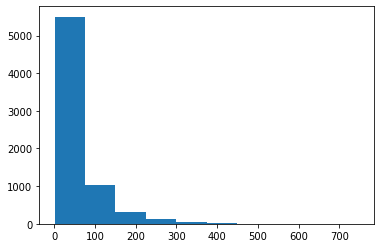

In [12]:
plt.hist(list(degrees.values()))

In [13]:
import numpy as np
np.median(list(degrees.values()))

31.0

In [14]:
np.mean(list(degrees.values()))

53.28563332388779

In [17]:
PPI[["n1_idx","n2_idx"]].values

array([[   0, 5001],
       [   0, 2416],
       [   0, 1595],
       ...,
       [7057, 6189],
       [7057, 3399],
       [7057, 3279]])

In [19]:
import networkx as nx
G=nx.Graph()
G.add_edges_from(PPI[["n1_idx","n2_idx"]].values)


In [20]:
subgraph_num_nodes = [len(c) for c in sorted(nx.connected_components(G), key=len, reverse=True)]

In [21]:
subgraph_num_nodes #all nodes are connected

[7058]

In [22]:
Fedges = [(0,1),(1,2),(2,0),(0,9),(4,5),(5,6)] #2 connected graphs
F=nx.Graph()
F.add_edges_from(Fedges)
[len(c) for c in sorted(nx.connected_components(F), key=len, reverse=True)]

[4, 3]

In [25]:
HN = pd.read_csv('data/HumanNet/HS-PI.tsv',delimiter='\t',header=None)

In [26]:
len(HN)

633460